# STAT207 Mini-Project #2 - Video Game Sales Prediction


Albert Chen

In [477]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)

## 1. Introduction

The primary research goal is to develop a predictive model that will effectively predict video game sales for new datasets, with consideration to at least five explanatory variables such as used game price, maximum players, multiplatform availability, online features, and review scores. This will not only help to predict outcomes with high accuracy but also to understand the overall success of video games. 

My secondary research goal looks to yield reliable insights into how these variables interact and influence each other, shedding light on what kinds of features contributes to a video games success. 

Someone might be motivated to build a predictive model that predicts video game sales for new datasets as it will allow for video game makers to get an idea of how successful in terms of sales that their video game will be based on the features/explanatory variables it has. One person in particular that might find my predicitive model useful would be video game developer as they might use it to try and see what kinds of features and variables they need to add or change in order to maximize their profits and overall success of their video game.

## 2. Dataset Discussion

In [478]:
df = pd.read_csv("video_games.csv")
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [479]:
num_rows_1 = df.shape[0]
print(f"The number of rows is: {num_rows_1}")

The number of rows is: 1212


I got this csv file/dataset from Professor Ellison as it was the suggested dataset to use for this project. The dataset can be found here: https://corgis-edu.github.io/corgis/csv/video_games/ and was downloaded by me on 3/28/24. 

## 3. Dataset Cleaning

Professionalism
* Your written discussion in this section should be written in complete sentences. * Written in a markdown cell, not a code cell.
General Data Cleaning
* When experimenting with your datasets and models in your "scratchsheet" jupyter notebook you may have determined that your dataset should be cleaned in various ways in order to more effectively pursue your research goals (before splitting it into a training and test dataset).
* Discuss and show any data cleaning steps taken in this section.
* Be sure to discuss WHY you choose to perform each step of your data cleaning and how this might impact the results of your analysis.

For my datacleaning I decided to first narrow down my dataframe to include only the variables that I was using to answer my research goals. Next I dropped all exlicit missing values from the dataframe and looked at each columns datatypes to try and determine if there were any implicit missing values that I might not have dropped with the .dropna() function. I decided to stick with this data cleaning technique as 

In [480]:
df = df[["Metrics.Sales", "Metrics.Used Price", "Features.Max Players", "Features.Multiplatform?", "Features.Online?", "Metrics.Review Score"]]
df.isna().sum()

Metrics.Sales              0
Metrics.Used Price         0
Features.Max Players       0
Features.Multiplatform?    0
Features.Online?           0
Metrics.Review Score       0
dtype: int64

In [481]:
df = df.dropna()
df

,Metrics.Sales,Metrics.Used Price,Features.Max Players,Features.Multiplatform?,Features.Online?,Metrics.Review Score
0,4.69,24.95,1,True,True,85
1,0.56,14.95,1,True,True,89
2,0.54,22.95,2,True,True,81
3,0.49,12.95,1,True,True,81
4,0.45,14.95,1,True,True,61
...,...,...,...,...,...,...
1207,0.03,17.95,1,True,True,71
1208,0.03,17.95,1,True,True,62
1209,0.03,15.95,1,True,True,51
1210,0.02,17.95,2,True,True,64


In [482]:
df.dtypes

Metrics.Sales              float64
Metrics.Used Price         float64
Features.Max Players         int64
Features.Multiplatform?       bool
Features.Online?              bool
Metrics.Review Score         int64
dtype: object

In [483]:
np.unique(df["Metrics.Used Price"].values)

array([ 4.95,  5.95,  6.95,  7.95,  8.95,  9.95, 10.95, 11.95, 12.95,
       13.95, 14.95, 15.95, 16.95, 17.95, 19.95, 22.95, 23.95, 24.95,
       26.95, 27.95, 29.95, 32.95, 34.95, 39.95, 44.95, 47.95, 49.95])

In [484]:
df = df.rename(columns={
    'Metrics.Used Price': 'Metrics_Used_Price',
    'Features.Multiplatform?': 'Features_Multiplatform',
    'Features.Online?': 'Features_Online', 
    'Features.Max Players' : 'Features_Max_Players',
    'Metrics.Review Score' : 'Metrics_Review_Score',
    'Metrics.Sales' : 'Metrics_Sales'
})


My dataset did in fact have explicit missing values that were all in the Metadata.Publishers variable of my dataframe. After further investigation, I determined that there were no other implicit missing values in my dataframe with my three selected variables as I looked at each unique value in all three of my columns and found that there was no data that represented a missing value after having dropped the explicit missing values. In total, there were 264 rows dropped from the original dataset. 

The pros of using this missing values cleaning technique that I just used include the simplicity of the technique and the ability to capture all implicit and explicit missing values. On the other hand, some cons of using this cleaning technique could be the fact that in a dataset where a variable has more unique values, it is possible to miss a value that should be classified as a missing value and dropped(human error). Also by dropping some of these "missing values" we might be getting rid of valuable data points that could be important in accurately representing the dataset and thus creating some bias. 

## 4. Preliminary Analysis

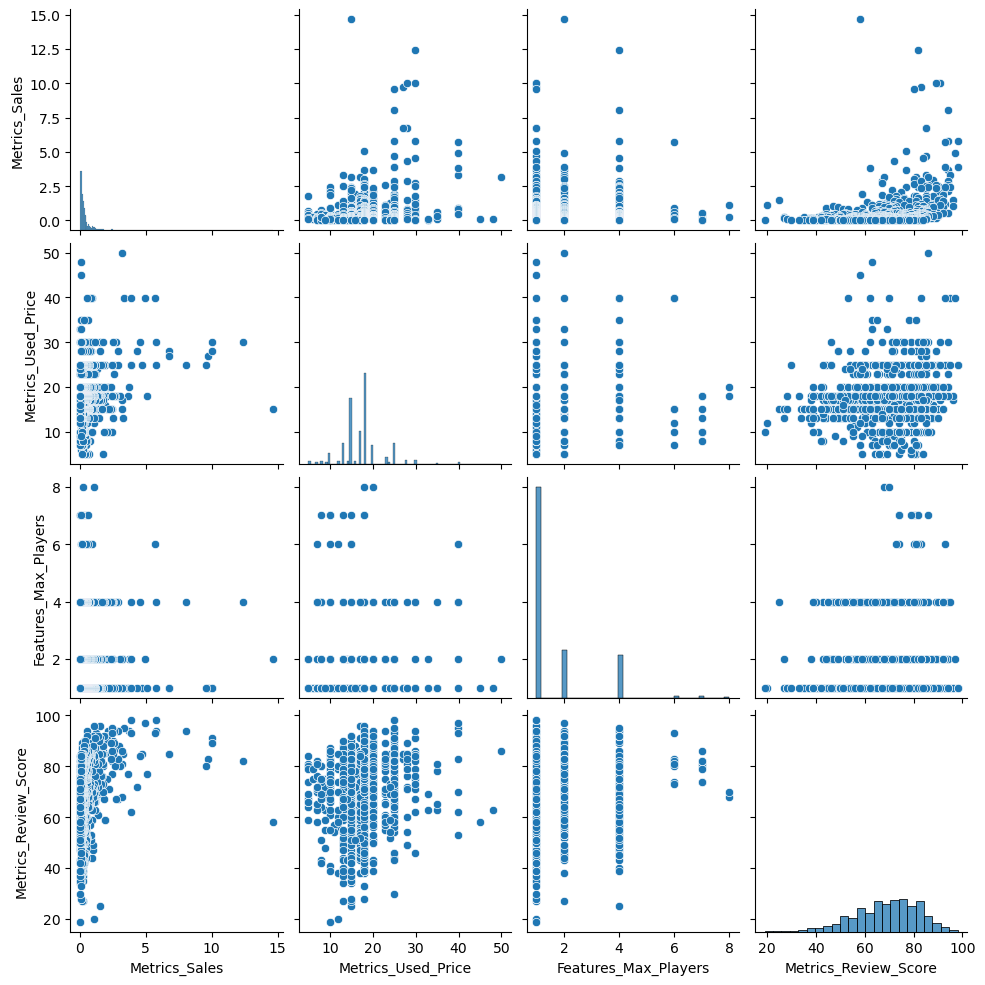

In [485]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.pairplot(df[numerical_vars])
plt.show()


In [486]:
import statsmodels.formula.api as smf

slr_model = smf.ols(formula='Metrics_Sales ~ Metrics_Used_Price + Features_Max_Players + Features_Multiplatform + Features_Online + Metrics_Review_Score', data=df).fit()
slr_model

In [487]:
slr_model.fittedvalues.head()

0    1.172117
1    0.777426
2    1.052578
3    0.509690
4    0.176704
dtype: float64

In [488]:
slr_model.resid.head()

0    3.517883
1   -0.217426
2   -0.512578
3   -0.019690
4    0.273296
dtype: float64

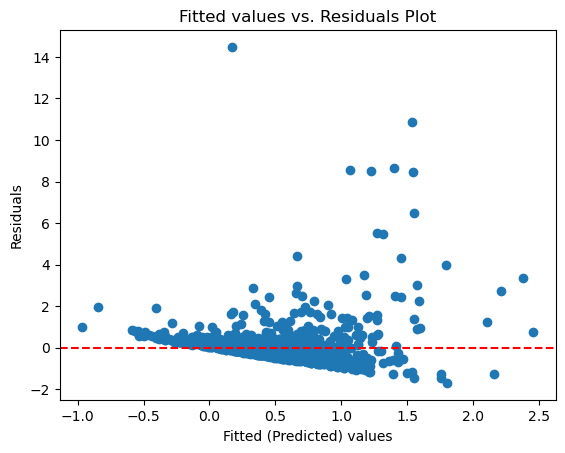

In [489]:
plt.scatter(slr_model.fittedvalues, slr_model.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted (Predicted) values')
plt.ylabel('Residuals')
plt.title('Fitted values vs. Residuals Plot')
plt.show()


Do you have any reason to believe that some of your linear regression models may achieve a better fit (of either the training or the test dataset) if you were to first transform one or more of your variables in your CLEANED dataset? YEs I think that some of my linear regression models could acheive a better fit as we can see that currently the fitted values vs residuals plot does not satisfy the linearity assumption with there not being a equal amount of positive and negative residuals distributed when we divide up the plot into smaller evenly sized boxes. Variance of residuals accross the board as well as high outliers might also be influencing the fit of the model.  

Transforming this variable does appear to have helped my lienarity assumption to become closer to being met as the distribution of positive and negative residuals is slightly better however overall it is still not a perfect fit and is a little ways away from passing the linearity assumption.

In [490]:
df['Log_Metrics_Sales'] = np.log(df['Metrics_Sales'] + 1)  


In [491]:
transformed_model = smf.ols(formula='Log_Metrics_Sales ~ Metrics_Used_Price + Features_Max_Players + Features_Multiplatform + Features_Online + Metrics_Review_Score', data=df).fit()
transformed_model

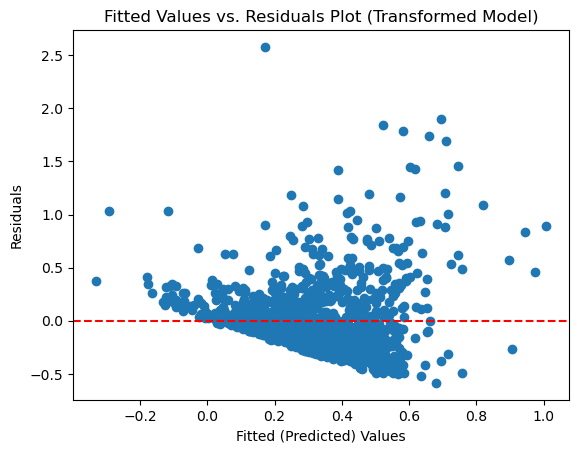

In [492]:
transformed_predictions = transformed_model.fittedvalues
transformed_residuals = df['Log_Metrics_Sales'] - transformed_predictions

plt.scatter(transformed_model.fittedvalues, transformed_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted (Predicted) Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals Plot (Transformed Model)')
plt.show()


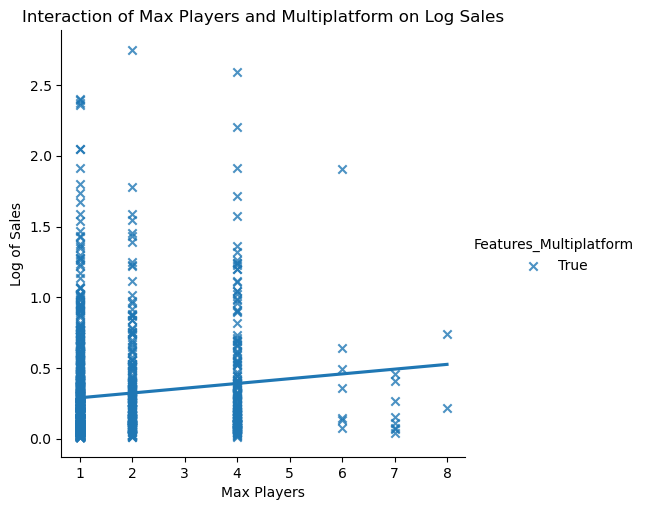

In [493]:
import seaborn as sns



df['Features_Multiplatform'] = df['Features_Multiplatform'].astype(str)
sns.lmplot(x='Features_Max_Players', y='Log_Metrics_Sales', hue='Features_Multiplatform', data=df, ci=None, markers=['x'])
plt.title('Interaction of Max Players and Multiplatform on Log Sales')
plt.xlabel('Max Players')
plt.ylabel('Log of Sales')
plt.show()


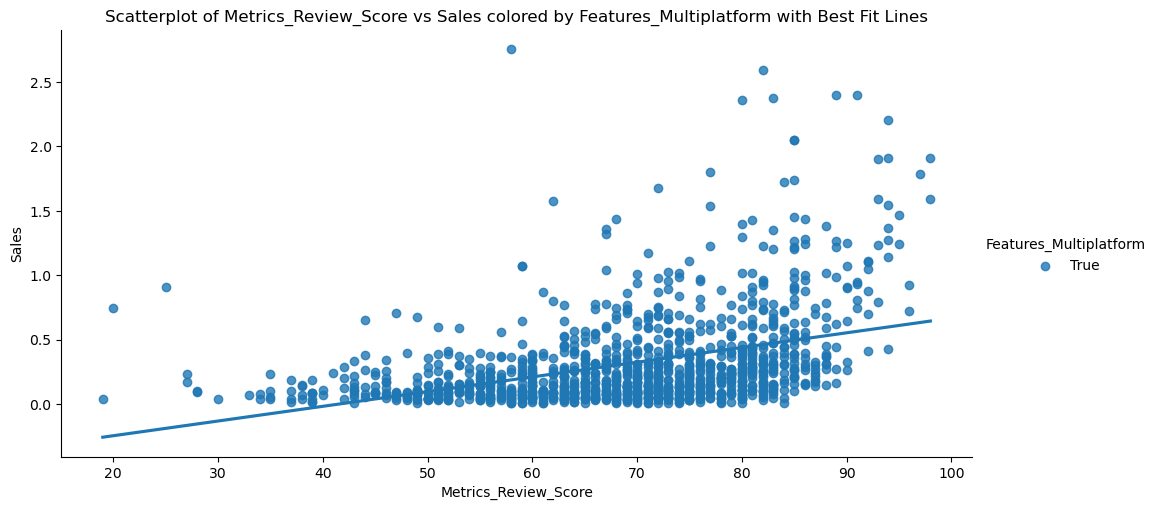

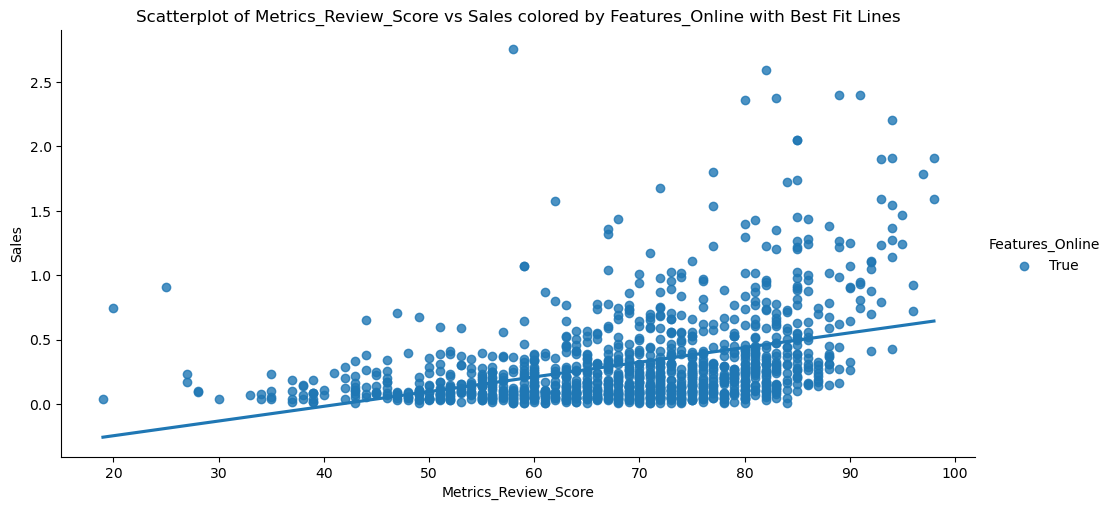

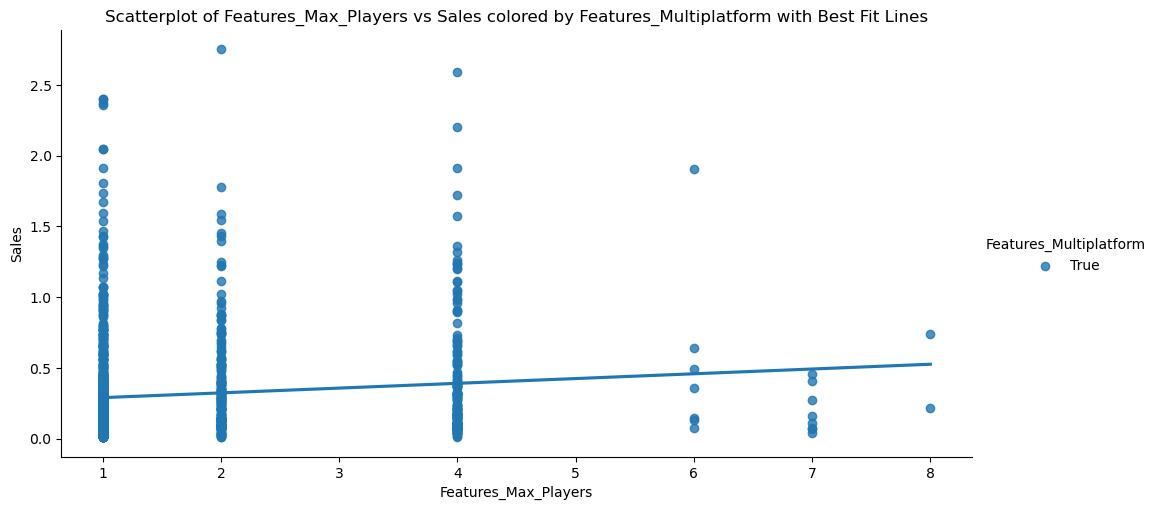

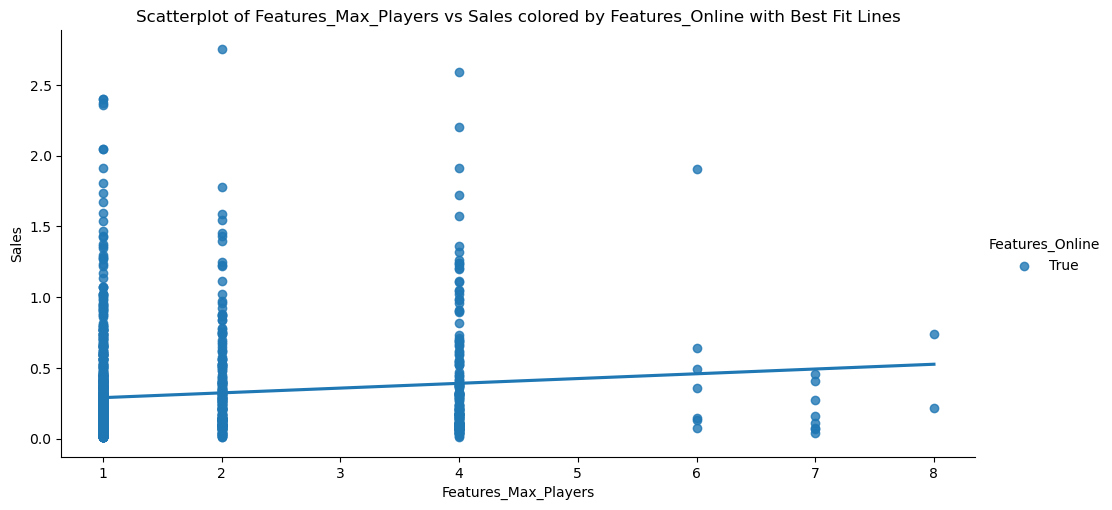

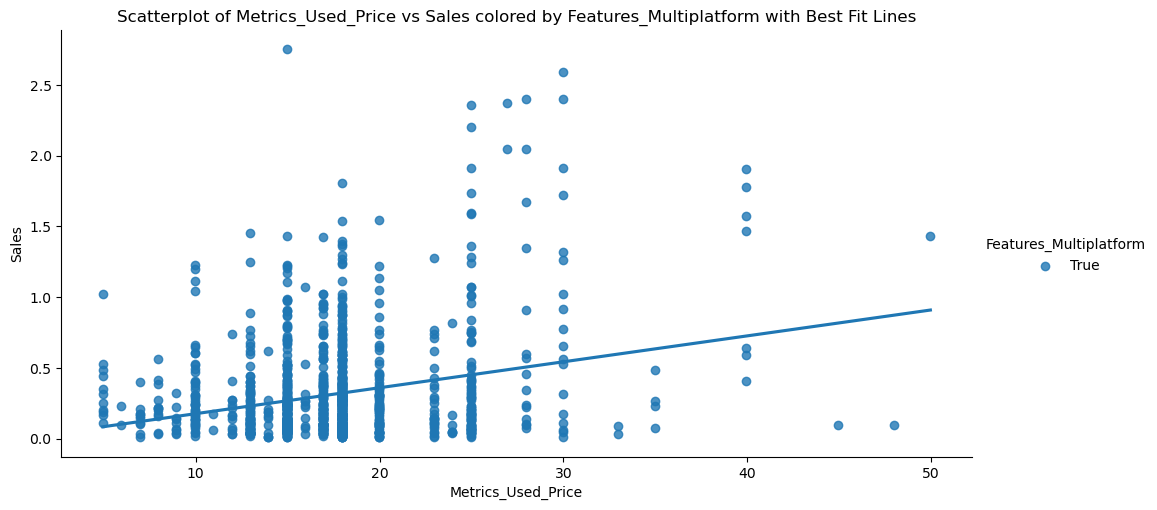

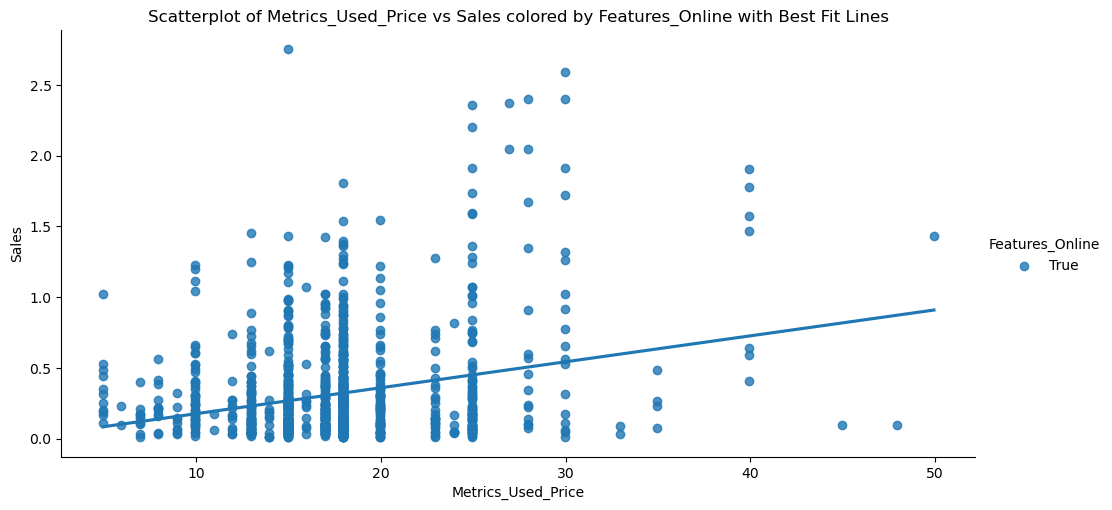

In [494]:
numerical_variables = ['Metrics_Review_Score', 'Features_Max_Players', 'Metrics_Used_Price']
categorical_variables = ['Features_Multiplatform', 'Features_Online']

for num_var in numerical_variables:
    for cat_var in categorical_variables:
        sns.lmplot(x=num_var, y='Log_Metrics_Sales', hue=cat_var, data=df, aspect=2, ci=None, palette='tab10')
        plt.title(f'Scatterplot of {num_var} vs Sales colored by {cat_var} with Best Fit Lines')
        plt.xlabel(num_var)
        plt.ylabel('Sales')
        plt.show()

Since there was only one unique item in each categorical variable, there weren't different lines/slopes to compare to determine if there was interaction.

## 5. Predictive Models

In [495]:
categorical_variables = df[["Features_Multiplatform", "Features_Online"]]
dummies = pd.get_dummies(categorical_variables, drop_first=True, dtype=int)
dummies

,Features_Online
0,True
1,True
2,True
3,True
4,True
...,...
1207,True
1208,True
1209,True
1210,True


In [496]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=207)
df_train.head()

,Metrics_Sales,Metrics_Used_Price,Features_Max_Players,Features_Multiplatform,Features_Online,Metrics_Review_Score,Log_Metrics_Sales
876,1.09,17.95,1,True,True,66,0.737164
590,0.29,17.95,1,True,True,62,0.254642
424,3.84,39.95,4,True,True,62,1.576915
1171,0.05,17.95,2,True,True,72,0.048790
946,0.43,17.95,4,True,True,86,0.357674


In [497]:
df_test.head()

,Metrics_Sales,Metrics_Used_Price,Features_Max_Players,Features_Multiplatform,Features_Online,Metrics_Review_Score,Log_Metrics_Sales
144,0.06,17.95,1,True,True,71,0.058269
559,0.35,17.95,1,True,True,53,0.300105
906,0.66,14.95,1,True,True,72,0.506818
337,0.09,14.95,1,True,True,68,0.086178
918,0.56,17.95,1,True,True,71,0.444686


In [498]:
X_train = df_train.drop(['Metrics_Sales'], axis=1)
X_train.head()

,Metrics_Used_Price,Features_Max_Players,Features_Multiplatform,Features_Online,Metrics_Review_Score,Log_Metrics_Sales
876,17.95,1,True,True,66,0.737164
590,17.95,1,True,True,62,0.254642
424,39.95,4,True,True,62,1.576915
1171,17.95,2,True,True,72,0.048790
946,17.95,4,True,True,86,0.357674


In [499]:
y_train = df_train['Metrics_Sales']
y_train.head()

876     1.09
590     0.29
424     3.84
1171    0.05
946     0.43
Name: Metrics_Sales, dtype: float64

In [500]:
X_test = df_test.drop(['Metrics_Sales'], axis=1)
X_train.head()

,Metrics_Used_Price,Features_Max_Players,Features_Multiplatform,Features_Online,Metrics_Review_Score,Log_Metrics_Sales
876,17.95,1,True,True,66,0.737164
590,17.95,1,True,True,62,0.254642
424,39.95,4,True,True,62,1.576915
1171,17.95,2,True,True,72,0.048790
946,17.95,4,True,True,86,0.357674


In [501]:
y_test = df_test['Metrics_Sales']
y_test.head()

144    0.06
559    0.35
906    0.66
337    0.09
918    0.56
Name: Metrics_Sales, dtype: float64

In [502]:
scaler = StandardScaler()

numerical_features = ['Metrics_Used_Price', 'Features_Max_Players', 'Metrics_Review_Score'] 
X_train_scaled = X_train.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train_scaled = pd.DataFrame(X_train_scaled[numerical_features], columns=X_train[numerical_features].columns)
X_train_scaled.head()


,Metrics_Used_Price,Features_Max_Players,Metrics_Review_Score
876,0.092011,-0.548671,-0.217675
590,0.092011,-0.548671,-0.527863
424,4.560118,1.897627,-0.527863
1171,0.092011,0.266762,0.247606
946,0.092011,1.897627,1.333262


In [503]:
X_test_scaled = X_test.copy()
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
X_test_scaled = pd.DataFrame(X_test_scaled[numerical_features], columns=X_train[numerical_features].columns)
X_test_scaled

,Metrics_Used_Price,Features_Max_Players,Metrics_Review_Score
144,0.092011,-0.548671,0.170059
559,0.092011,-0.548671,-1.225785
906,-0.517276,-0.548671,0.247606
337,-0.517276,-0.548671,-0.062582
918,0.092011,-0.548671,0.170059
...,...,...,...
569,-0.111084,-0.548671,1.333262
482,-0.111084,0.266762,-0.915597
843,0.092011,1.897627,1.333262
1147,1.513682,-0.548671,1.023075


In [504]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [505]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

In [506]:
lin_reg_model.score(X_test, y_test)

0.734978817881446

## 5.2. Non-Regularized Linear Regression Full Model with Interaction Terms

Since I didn't have any interaction in part 4 my test R^2 would be the same as in 5.1

In [507]:
lin_reg_model.score(X_test,y_test)

0.734978817881446

## 5.3 Feature Selection

In [511]:
from sklearn.metrics import r2_score

explanatory_variables = list(X_train.columns)
best_test_r2 = -np.inf
best_model = None
best_variables = explanatory_variables.copy()  
variables_removed = []

while len(explanatory_variables) > 0:
    variable_to_remove = None
    current_best_r2 = -np.inf  
    
    for var in explanatory_variables:
        trial_variables = [v for v in explanatory_variables if v != var]
        model = LinearRegression().fit(X_train[trial_variables], y_train)
        trial_r2 = r2_score(y_test, model.predict(X_test[trial_variables]))
        if trial_r2 > current_best_r2:
            current_best_r2 = trial_r2
            variable_to_remove = var
    if variable_to_remove and current_best_r2 > best_test_r2:
        explanatory_variables.remove(variable_to_remove)
        variables_removed.append(variable_to_remove)  
        best_test_r2 = current_best_r2
        best_model = model
        best_variables = explanatory_variables[:]
    else:
        break
print("Variables removed for the best model:", variables_removed)
print("The variables for the best model are:", best_variables)
print(f"The test R^2 for the final model was: {best_test_r2:.4f}")


Variables removed for the best model: ['Metrics_Used_Price', 'Features_Max_Players']
The variables for the best model are: ['Features_Online', 'Metrics_Review_Score', 'Log_Metrics_Sales']
The test R^2 for the final model was: 0.7367


The Test R^2 for my final model was 0.7367

## 6. Best Model Discussion

In [514]:
transformed_model = smf.ols(formula='Metrics_Sales ~ Features_Online + Metrics_Review_Score + Log_Metrics_Sales', data=df).fit()
transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Metrics_Sales   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2853.
Date:                Sun, 31 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:20:35   Log-Likelihood:                -744.32
No. Observations:                1212   AIC:                             1495.
Df Residuals:                    1209   BIC:                             1510.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   0.0616      0.036      1.712      0.087      -0.009       0.132
Features_Online[T.True]     0.0616      0.036      1.712      0.087      -0.009       0.132
Metrics_Review_Score       -0.0071      0.001     -6.484      0.000      -0.009      -0.005
Log_Metrics_Sales           2.7759      0.039     71.359      0.000       2.700       2.852
==============================================================================
Omnibus:                     1628.348   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           456254.658
Skew:                           7.146   Prob(JB):                         0.00
Kurtosis:                      96.971   Cond. No.                     4.38e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The equation for the best model is: Metrics_Sales-hat=0.0616+0.0616×Features_Online[T.True]−0.0071×Metrics_Review_Score+2.7759xLog_Metrics_Sales

<AxesSubplot: >

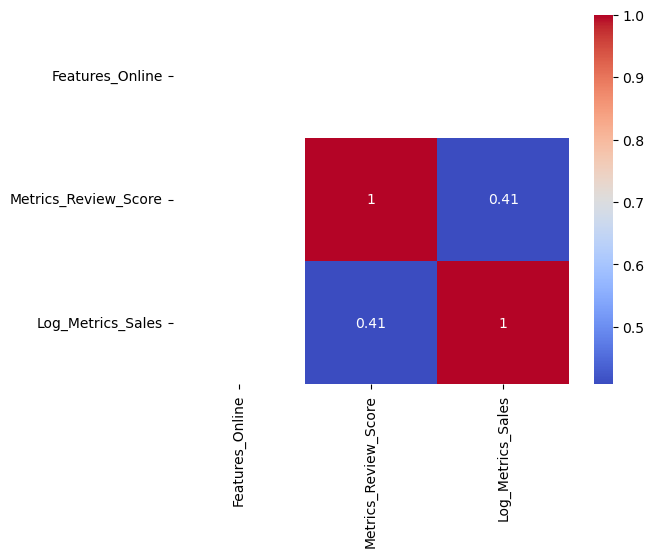

In [515]:
sns.heatmap(X[best_variables].corr(), annot=True, cmap='coolwarm')

The overall fit of this best model for the dataset was pretty good at 0.7367. My final model excluded Features_Max_Players, MEtrics_Used_PRice meaning that they were unnecessary and causing overfitting to the model. Overfitting does not seem to be an issue in my model as there is no pair that has a large correlation coef that would indicate multicollinearity. Features_Online[T.True] would be considered more "important" in terms of its impact magnitude on log-transformed sales compared to Metrics_Review_Score as we see there is a larger positive increase of 0.0616 units in the log-transformed sales when there is online features compared to when there's not, holding all variables constant while all else being equal, a one-unit increase in the review score is associated with a decrease of 0.0071 units in the log-transformed sales.

## 7. Conclusion

The best model had a relatively strong test R^2 of 0.7367 meaning that on the surface, I would recommend this model to the person working on creating a game as it would be able to give a better than chance probability of increasing sales. However, I do not know for certain that this is the best model possible that will yeild the height tets R^2 as there are alternate models that could be used to improve test R^2 such as regularization models. Some shortcomings that I had were the variables that I chose as they weren't the greatest and caused me to have to change some throughout the project. I first started with 3 categorical variables however, they all only had true values and some were classified as objects which created issues when I was trying to scale and create models. Additionally, some of these variables just wouldn't show up when I performed certain functions as they were dropped when I used drop_first=True which caused issues. In the future if I were to pursue this project, I would try and either get better data or at the very least avoid explanatory variables such as the ones I selected and elect to use more numerical or categorical variables that weren't boolean. I would also see if using more variables would produce better results as a combination of variables would be easier to narrow down with a larger starting point to select from.